<a href="https://colab.research.google.com/github/balamurugan213/Python-for-Data-science/blob/main/keras130120201(cat_and_dog).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as k
import numpy as np
from tensorflow.keras import backend as k
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import   ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from matplotlib import  pylab as plt
from sklearn.metrics import  confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path_='drive/My Drive/image/cnn_data/data/train'
test_path_='drive/My Drive/image/cnn_data/data/test'
valid_path_='drive/My Drive/image/cnn_data/data/validation'
train_batch=ImageDataGenerator().flow_from_directory('drive/My Drive/image/cnn_data/data/train', target_size=(224,224), classes=['dog','cat'],batch_size=10)
test_batc=ImageDataGenerator().flow_from_directory('drive/My Drive/image/cnn_data/data/test', target_size=(224,224),classes=['dog','cat'],batch_size=4)
valid_batch=ImageDataGenerator().flow_from_directory('drive/My Drive/image/cnn_data/data/validation', target_size=(224,224), classes=['dog','cat'],batch_size=10)

Found 2000 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
def plots(ims,figsize=(12,6),rows=1, interp=False,titles=None):
  if type(ims[0]) is np.ndarray:
    ims=np.array(ims).astype(np.uint8)
    if(ims.shape[-1]!=3):
      ims =ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols =len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
      sp= f.add_subplot(rows,cols,i+1)
      sp.axis('off')
      if titles is not None:
        sp.set_title(titles[i],fontsize=16)
      plt.imshow(ims[i],interpolation=None if interp else 'none')

In [ ]:
imgs,labels=next(train_batch)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


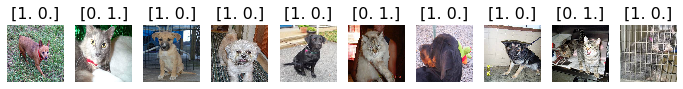

In [ ]:
plots(imgs,titles=labels)

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [ ]:
model= Sequential()
for layers in vgg16_model.layers:
  model.add(layers)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
model.layers.pop()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
for layers in model.layers:
  layers.trainable=False

In [ ]:
model.add(Dense(2,activation='softmax'))

In [ ]:
model.pop()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batch,steps_per_epoch=40, validation_data=valid_batch,validation_steps=20,epochs=5)

Epoch 1/5
40/40 [==============================] - 23s 582ms/step - loss: 0.4031 - acc: 0.8350 - val_loss: 0.2462 - val_acc: 0.9050
Epoch 2/5
40/40 [==============================] - 4s 98ms/step - loss: 0.2745 - acc: 0.8975 - val_loss: 0.1741 - val_acc: 0.9250
Epoch 3/5
40/40 [==============================] - 4s 98ms/step - loss: 0.2230 - acc: 0.9100 - val_loss: 0.1497 - val_acc: 0.9450
Epoch 4/5
40/40 [==============================] - 4s 99ms/step - loss: 0.1784 - acc: 0.9275 - val_loss: 0.1460 - val_acc: 0.9350
Epoch 5/5
40/40 [==============================] - 4s 104ms/step - loss: 0.0878 - acc: 0.9700 - val_loss: 0.1430 - val_acc: 0.9400


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


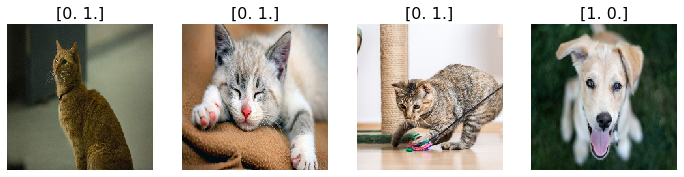

In [ ]:
test_img,test_labels=next(test_batc)
plots(test_img,titles=test_labels)

In [ ]:
test_labels=test_labels[:,0]
test_labels

array([0., 0., 0., 1.], dtype=float32)

In [ ]:
predictions=model.predict_generator(test_batc,steps=1,verbose=0)

In [ ]:
predictions

array([[1.5350813e-01, 8.4649193e-01],
       [1.7727073e-02, 9.8227292e-01],
       [1.4394556e-01, 8.5605448e-01],
       [9.9997318e-01, 2.6770786e-05]], dtype=float32)

In [ ]:
for i in predictions:
  if i[0]<i[1]:
    i[0]=0
    i[1]=1
  else:
    i[0]=1
    i[1]=0


In [ ]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
cm=confusion_matrix(test_labels,predictions[:,0])

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion matrix',cmap=plt.cm.Blues):
  """
  For printing the confusion matrix
  normalization can be applied by setting normalize=true
  """
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusu=ion matrix")
  else:
    print("confusion matrix, without normalization")
  print(cm)

  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
             horizontalalignment='center',
             color="white" if cm[i,j]> thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predited label')

confusion matrix, without normalization
[[3 0]
 [0 1]]


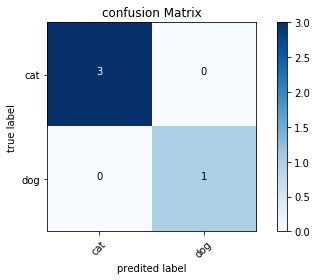

In [ ]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='confusion Matrix')

In [ ]:
model.save('drive/My Drive/image_finder.h5')

In [ ]:
model.save('cat_dog_finder.h5')